## Credit Risk Analysis | Supervised Learning ##

A Supervised Learning project that analzes historical lending activity fir a peer-to-peer lending services company to identify the creditworthiness of borrowers.

In [1]:
# Imports the data manipulation modules and basic dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import dataframe_image as dfi
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Imports the machine learning models
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

# Imports the machine learning reporting modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn import metrics

---

## Data Preparation ##

#### Step 1: Data Aggregation (Lending Data from CSV)

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data = pd.read_csv(Path("./data/lending_data.csv"))
lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


#### Step 2: Model Preparation ("Train, Test, Split")

In [3]:
# Creates the y variable (the labels)
y = lending_data["loan_status"]

# Seperates the X variable (the features)
X = lending_data.drop(columns=['loan_status'])

# Splits the data using train_test_split with a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Checks the balance of our target values to determine if oversampling is needed
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

---

#### Step 3: Sample Optimization ("Random OverSampler")

In [4]:
# Instantiates the random oversampler model with random_state parameter of 1
random_oversampler = RandomOverSampler(random_state=1)

# Fits the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

# Checks the resamped y values
y_resampled.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

#### Step 4: Report Builder ("Classification Report")

In [5]:
# Function turns default classification reports into DataFrames for sharing
def get_classification_report(y_test, y_pred):
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    return df_classification_report

## Machine Learning Models ##

#### Model 1: Logistic Regression (Original Training Data)

0.95

objc[97873]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4af4d948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/102.0.5005.115/Libraries/libGLESv2.dylib (0x10a977290). One of the two will be used. Which one is undefined.
[0622/131024.592250:INFO:headless_shell.cc(660)] Written to file /var/folders/b1/m94z813d1ts4c217p8lxdcdr0000gn/T/tmpcz0td19r/temp.png.


,precision,recall,f1-score,support
0,1.00,0.99,1.00,18765.00
1,0.85,0.91,0.88,619.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.92,0.95,0.94,19384.00
weighted avg,0.99,0.99,0.99,19384.00


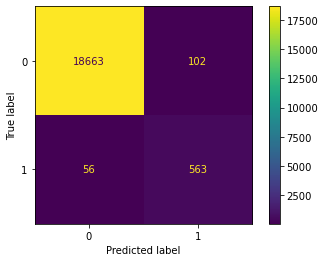

In [6]:
# Builds a LogisticRegression model with random_state parameter of 1
logistic_regression_model = LogisticRegression(random_state=1)

# Trains it on the X_train and y_train
logistic_regression_model.fit(X_train, y_train)

# Uses the trained model to predict using X_test_scaled
y_pred_original = logistic_regression_model.predict(X_test)

# Balanced Accuracy Score
accuracy_score_original = balanced_accuracy_score(y_test, y_pred_original).round(2)
display(accuracy_score_original)

# Confusion Matrix
cm_original = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_original)
cm_original.figure_.savefig("./images/cm_original.png")

# Classification Report
cr_original = get_classification_report(y_test, y_pred_original).round(2)
dfi.export(cr_original, './images/original_classification_report.png')
display(cr_original)

---

#### Model 2: Logistic Regression (Resampled Training Data)

0.99

objc[97888]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4af4d948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/102.0.5005.115/Libraries/libGLESv2.dylib (0x11d7e3290). One of the two will be used. Which one is undefined.
[0622/131034.358104:INFO:headless_shell.cc(660)] Written to file /var/folders/b1/m94z813d1ts4c217p8lxdcdr0000gn/T/tmp7rpei1yk/temp.png.


,precision,recall,f1-score,support
0,1.00,0.99,1.00,18765.00
1,0.84,0.99,0.91,619.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.92,0.99,0.95,19384.00
weighted avg,0.99,0.99,0.99,19384.00


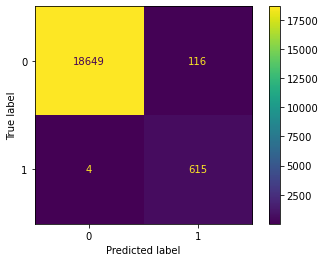

In [8]:
# Builds the Logistic Regression model with a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fits the model using the resampled training data
model.fit(X_resampled, y_resampled)

# Makes prediction using the testing data
y_pred_resampled = model.predict(X_test)

# Balanced Accuracy Score
accuracy_score_resampled = balanced_accuracy_score(y_test, y_pred_resampled).round(2)
display(accuracy_score_resampled)

# Confusion Matrix
cm_resampled = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_resampled)
cm_resampled.figure_.savefig("./images/cm_resampled.png")

# Classification Report
cr_resampled = get_classification_report(y_test, y_pred_resampled).round(2)
dfi.export(cr_resampled, './images/resampled_classification_report.png')
display(cr_resampled)

#### Results: Comparison of Models

Overall, the model using the resampled data made much more accurate predictions for the loan data across both classes. The precision scores for the healthy loans are virtually identical across both models

- **Model 1** predicts the **healthy loans** with 95% accuracy, 100% precision, and 99% recall, and the **high-risk loans** with 95% accuracy, 85% precision, and 91% recall.

- **Model 2** predicts the **healthy loans** with 99% accuracy, 100% precision, and 99% recall and the **risky loans** with 99% accuracy, 84% precision and 99% recall.